In [52]:
import pandas as pd
import numpy as np
import glob
import os
import sys

def getting_metaInfo_experiment_i(directory_path):
    return pd.read_csv(os.path.join(directory_path, "experiment-i/subject-info-i.csv"))


def getting_metaInfo_experiment_ii(directory_path):
    return pd.read_csv(
        os.path.join(directory_path, "experiment-ii/subject-info-ii.csv")
    )

def reading_experiment_i_data(directory_path):
    subject_posture_data = {}
    subject_folders = sorted(glob.glob(os.path.join(directory_path, "S*")))  # e.g., "S1", "S2", etc.

    for subject in subject_folders:
        subject_id = os.path.basename(subject)
        subject_posture_data[subject_id] = {}

        txt_files = sorted(glob.glob(os.path.join(subject, "*.txt")))

        for txt_file in txt_files:
            posture_id = os.path.splitext(os.path.basename(txt_file))[0]  # Extract posture name (e.g., "1", "2")

            # Manually read and clean the file
            cleaned_data = []
            with open(txt_file, "r") as f:
                for line in f:
                    line = line.strip()
                    if line and not any(c.isalpha() for c in line):  # Ignore empty lines and non-numeric separators
                        cleaned_data.append([float(x) for x in line.split("\t")])  # Convert valid numeric data

            # Convert to NumPy array
            data = np.array(cleaned_data)

            # **Convert raw values (0-1000) to mmHg (0-100)**
            data = data * 0.1  # Apply conversion factor

            # Compute the number of frames
            total_values = data.size
            num_frames = total_values // (32 * 64)

            frames = data[: num_frames * 64 * 32].reshape(num_frames, 64, 32)
            frames = frames[2:]  # Only start at frame 3

            # Store frames under subject -> posture
            subject_posture_data[subject_id][posture_id] = frames

    return subject_posture_data


def reading_experiment_ii_data(directory_path):
    subject_posture_data = {}
    subject_folders = sorted(glob.glob(os.path.join(directory_path, "S*")))  # e.g., "S1", "S2", etc.

    for subject in subject_folders:
        subject_id = os.path.basename(subject)
        subject_posture_data[subject_id] = {}

        # open and process each folder in the subject folder
        for mat_kind in os.listdir(subject):

            mat_name = os.path.basename(mat_kind)

            subject_posture_data[subject_id][mat_name] = {}

            for posture in os.listdir(os.path.join(subject, mat_kind)):
                posture_id = os.path.splitext(os.path.basename(posture))[0]  # Extract posture name (e.g., "1", "2")

                print(f"Processing {subject_id} - {mat_name} - {posture_id}")

                # Manually read and clean the file
                cleaned_data = []
                print(os.path.join(subject, mat_kind, posture))
                with open(os.path.join(subject, mat_kind, posture), "r") as f:
                    for line in f:
                        line = line.strip()
                        if line and not any(c.isalpha() for c in line):  # Ignore empty lines and non-numeric separators
                            cleaned_data.extend([float(x) for x in line.split(" ")])  # Concatenate all numbers into a single sequence
                
                data = np.array(cleaned_data)
                subject_posture_data[subject_id][mat_name][posture_id] = data

    return subject_posture_data

test = reading_experiment_ii_data("/Users/guoxuanxu/Documents/local_repo/PosturePress/data/experiment-ii")

Processing S1 - Air_Mat - Matrix_Air_B8
/Users/guoxuanxu/Documents/local_repo/PosturePress/data/experiment-ii/S1/Air_Mat/Matrix_Air_B8.txt
Processing S1 - Air_Mat - Matrix_Air_B9
/Users/guoxuanxu/Documents/local_repo/PosturePress/data/experiment-ii/S1/Air_Mat/Matrix_Air_B9.txt
Processing S1 - Air_Mat - Matrix_Air_F3
/Users/guoxuanxu/Documents/local_repo/PosturePress/data/experiment-ii/S1/Air_Mat/Matrix_Air_F3.txt
Processing S1 - Air_Mat - Matrix_Air_F2
/Users/guoxuanxu/Documents/local_repo/PosturePress/data/experiment-ii/S1/Air_Mat/Matrix_Air_F2.txt
Processing S1 - Air_Mat - Matrix_Air_F1
/Users/guoxuanxu/Documents/local_repo/PosturePress/data/experiment-ii/S1/Air_Mat/Matrix_Air_F1.txt
Processing S1 - Air_Mat - Matrix_Air_F5
/Users/guoxuanxu/Documents/local_repo/PosturePress/data/experiment-ii/S1/Air_Mat/Matrix_Air_F5.txt
Processing S1 - Air_Mat - Matrix_Air_F4
/Users/guoxuanxu/Documents/local_repo/PosturePress/data/experiment-ii/S1/Air_Mat/Matrix_Air_F4.txt
Processing S1 - Air_Mat - M

## Explore Data set

In [54]:
# process the subject info of the participants in experiment i


participants_i_meta_info = getting_metaInfo_experiment_i('/Users/guoxuanxu/Documents/local_repo/PosturePress/data')
participants_ii_meta_info = getting_metaInfo_experiment_ii('/Users/guoxuanxu/Documents/local_repo/PosturePress/data')

In [55]:
participants_ii_meta_info

,Subject-Number,Age,Height/cm,Weight/kg
0,1,19,175,87
1,2,23,183,85
2,3,23,183,100
3,4,24,172,66
4,5,27,179,96
5,6,27,186,63
6,7,30,174,74
7,8,30,174,79
8,12,33,170,78


In [56]:
test

{'S1': {'Air_Mat': {'Matrix_Air_B8': array([44., 43., 48., ..., 58., 53., 50.]),
   'Matrix_Air_B9': array([45., 42., 44., ..., 43., 47., 56.]),
   'Matrix_Air_F3': array([42., 44., 41., ..., 49., 49., 59.]),
   'Matrix_Air_F2': array([48., 44., 44., ..., 49., 51., 57.]),
   'Matrix_Air_F1': array([44., 43., 46., ..., 49., 56., 61.]),
   'Matrix_Air_F5': array([43., 44., 48., ..., 50., 48., 57.]),
   'Matrix_Air_F4': array([43., 42., 43., ..., 50., 50., 58.]),
   'Matrix_Air_F6': array([47., 43., 45., ..., 55., 52., 58.]),
   'Matrix_Air_F7': array([55., 48., 49., ..., 47., 50., 56.]),
   'Matrix_Air_E6': array([44., 43., 44., ..., 59., 55., 54.]),
   'Matrix_Air_D2': array([44., 44., 44., ..., 47., 46., 48.]),
   'Matrix_Air_D3': array([43., 44., 44., ..., 49., 49., 48.]),
   'Matrix_Air_D1': array([52., 44., 43., ..., 89., 72., 65.]),
   'Matrix_Air_E5': array([45., 44., 42., ..., 49., 56., 57.]),
   'Matrix_Air_E4': array([43., 43., 44., ..., 48., 51., 56.]),
   'Matrix_Air_E1': arr

Process data

In [57]:
test['S1'].keys()

dict_keys(['Air_Mat', 'Sponge_Mat'])

Only keep number starting at frame 3 because frame 1 and 2 include values way over 1000, which is past the range that sensor records.

In [92]:
d = test['S1']['Air_Mat']['Matrix_Air_B1']

d.reshape(-1, 27, 64).shape

(1, 27, 64)

In [91]:
d.shape

(1728,)

In [ ]:
for index, i in enumerate():
    print(i, end=' ')
    if (index + 1) % 27 == 0:
        print("\n")

44.0 44.0 50.0 47.0 47.0 49.0 47.0 47.0 48.0 50.0 46.0 49.0 44.0 43.0 43.0 42.0 42.0 43.0 44.0 41.0 44.0 47.0 44.0 44.0 43.0 42.0 44.0 

46.0 41.0 48.0 52.0 58.0 62.0 57.0 54.0 60.0 58.0 49.0 48.0 42.0 43.0 48.0 44.0 42.0 42.0 44.0 44.0 43.0 43.0 45.0 43.0 45.0 44.0 42.0 

44.0 44.0 50.0 47.0 52.0 61.0 55.0 55.0 69.0 64.0 49.0 47.0 45.0 46.0 44.0 44.0 43.0 43.0 46.0 41.0 43.0 44.0 43.0 43.0 43.0 44.0 46.0 

44.0 50.0 48.0 46.0 49.0 55.0 59.0 50.0 131.0 103.0 47.0 46.0 46.0 43.0 42.0 44.0 41.0 44.0 43.0 46.0 42.0 43.0 43.0 42.0 44.0 42.0 43.0 

52.0 65.0 75.0 73.0 79.0 386.0 487.0 102.0 603.0 393.0 67.0 59.0 51.0 46.0 48.0 49.0 46.0 45.0 44.0 47.0 43.0 44.0 45.0 44.0 45.0 46.0 45.0 

48.0 58.0 67.0 63.0 100.0 488.0 244.0 79.0 159.0 265.0 68.0 54.0 48.0 46.0 45.0 46.0 44.0 44.0 43.0 44.0 45.0 44.0 45.0 42.0 44.0 47.0 46.0 

44.0 47.0 44.0 45.0 49.0 69.0 52.0 45.0 53.0 66.0 48.0 44.0 43.0 43.0 44.0 41.0 42.0 43.0 42.0 43.0 44.0 42.0 44.0 43.0 43.0 46.0 44.0 

42.0 46.0 44.0 46.0 56.0 53.0

Pose 1 frames shape: (1, 64, 27)


/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_84007/3104712315.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


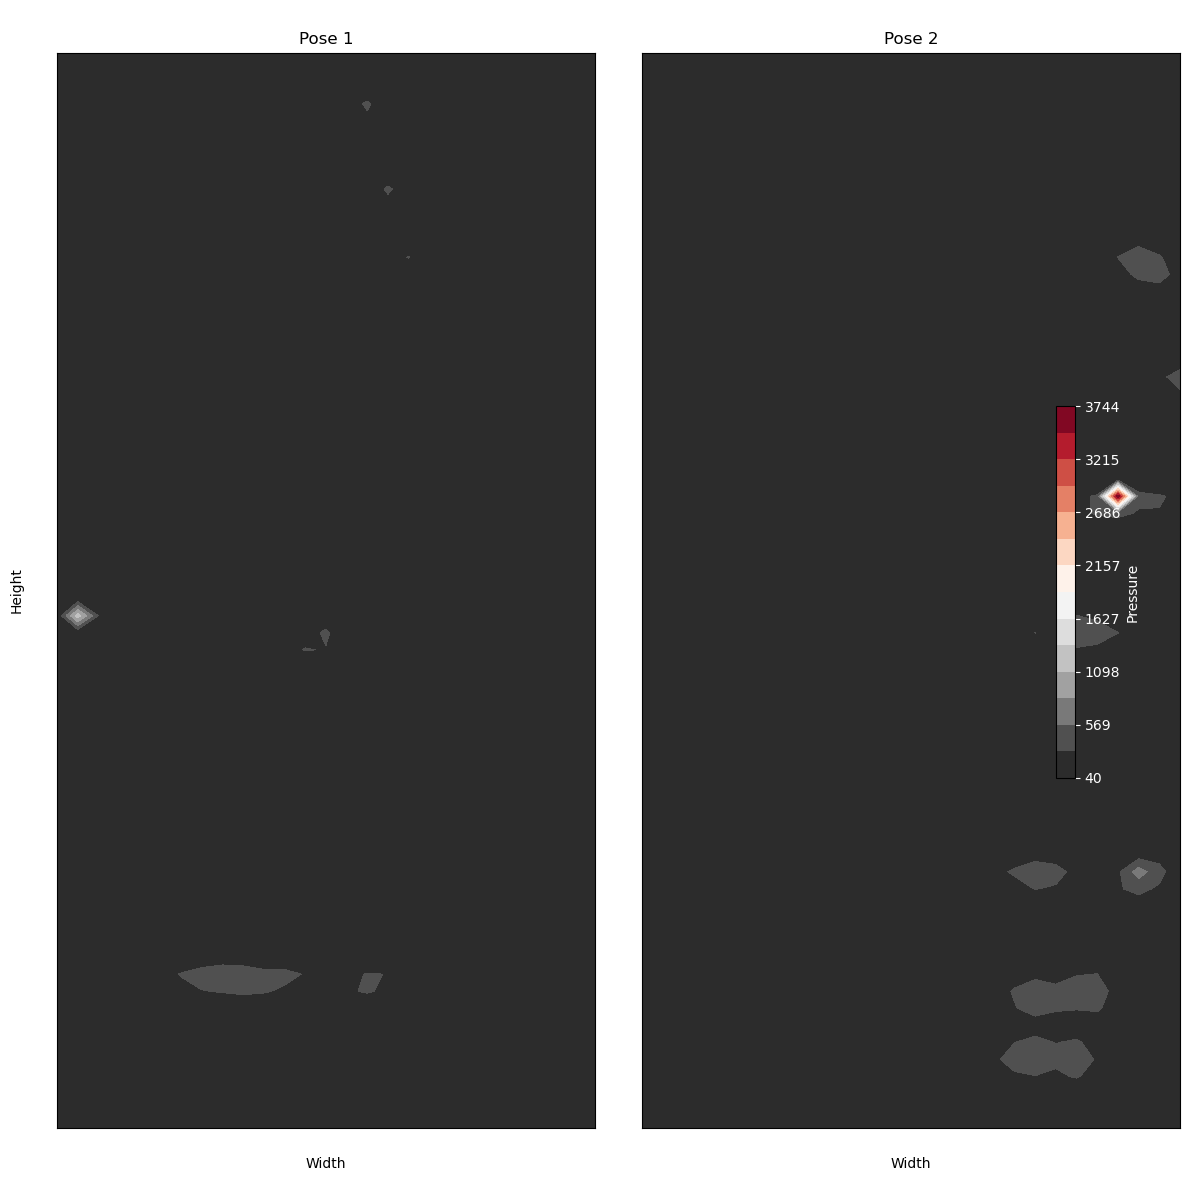

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pose_comparison(pose1_id='Matrix_Air_B1', pose2_id='Matrix_Air_B2', levels=15):
    all_frames_pose1, all_frames_pose2 = [], []

    # Collect frames for Pose 1
    if pose1_id in test['S1']['Air_Mat']:
        all_frames_pose1 = test['S1']['Air_Mat'][pose1_id]

    # Collect frames for Pose 2
    if pose2_id in test['S1']['Air_Mat']:
        all_frames_pose2 = test['S1']['Air_Mat'][pose2_id]

    if all_frames_pose1.size > 0 and all_frames_pose2.size > 0:
        # Reshape frames to 27x64
        frames_pose1 = all_frames_pose1.reshape(-1, 64, 27)
        frames_pose2 = all_frames_pose2.reshape(-1, 64, 27)

        print(f"Pose 1 frames shape: {frames_pose1.shape}")

        # Compute average pressure map for each posture
        avg_pose1 = np.mean(frames_pose1, axis=0)  # Mean over frames
        avg_pose2 = np.mean(frames_pose2, axis=0)  # Mean over frames

        # Find global min/max for consistent color scale
        vmin = min(avg_pose1.min(), avg_pose2.min())
        vmax = max(avg_pose1.max(), avg_pose2.max())

        # Generate identical contour levels
        contour_levels = np.linspace(vmin, vmax, levels)

        # Generate side-by-side contour plots
        fig, axes = plt.subplots(1, 2, figsize=(12, 12))

        # Contour Plot for Pose 1
        X, Y = np.meshgrid(np.arange(avg_pose1.shape[1]), np.arange(avg_pose1.shape[0]))
        contour1 = axes[0].contourf(X, Y, avg_pose1, levels=contour_levels, cmap='RdGy_r', vmin=vmin, vmax=vmax)
        axes[0].set_title('Pose 1')
        axes[0].set_xlabel('Width')
        axes[0].set_ylabel('Height')
        axes[0].invert_yaxis()
        axes[0].tick_params(colors='white')

        # Contour Plot for Pose 2
        contour2 = axes[1].contourf(X, Y, avg_pose2, levels=contour_levels, cmap='RdGy_r', vmin=vmin, vmax=vmax)
        axes[1].set_title('Pose 2')
        axes[1].set_xlabel('Width')
        axes[1].invert_yaxis()
        axes[1].tick_params(colors='white')

        # Common colorbar for both plots with white font
        cbar = fig.colorbar(contour2, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
        cbar.set_label('Pressure', color='white')
        cbar.ax.yaxis.set_tick_params(color='white')  # Change tick color
        plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')  # Change tick label color

        # Set white text for the entire figure
        plt.suptitle(f'Pressure Comparison: Posture {pose1_id} vs. Posture {pose2_id} (Same Contour Levels)', color='white')
        plt.tight_layout()
        plt.show()

plot_pose_comparison('Matrix_Air_F7', 'Matrix_Air_D1')


Pose frames shape: (1, 64, 27)


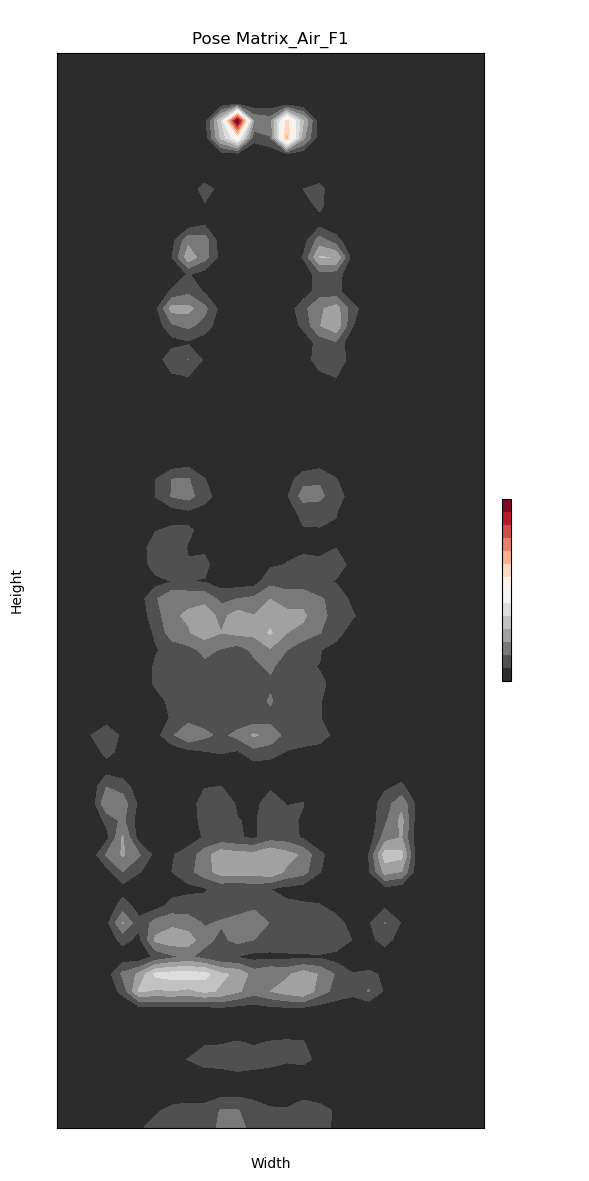

In [102]:
import numpy as np
import matplotlib.pyplot as plt

def plot_single_pose(pose_id='Matrix_Air_B1', levels=15):
    all_frames_pose = []

    # Collect frames for the specified pose
    if pose_id in test['S1']['Air_Mat']:
        all_frames_pose = test['S1']['Air_Mat'][pose_id]

    if all_frames_pose.size > 0:
        # Reshape frames to 27x64
        frames_pose = all_frames_pose.reshape(-1, 64, 27)

        print(f"Pose frames shape: {frames_pose.shape}")

        # Compute average pressure map for the posture
        avg_pose = np.mean(frames_pose, axis=0)  # Mean over frames

        # Find min/max for color scale
        vmin = avg_pose.min()
        vmax = avg_pose.max()

        # Generate contour levels
        contour_levels = np.linspace(vmin, vmax, levels)

        # Generate contour plot
        fig, ax = plt.subplots(figsize=(6, 12))

        # Contour Plot for the Pose
        X, Y = np.meshgrid(np.arange(avg_pose.shape[1]), np.arange(avg_pose.shape[0]))
        contour = ax.contourf(X, Y, avg_pose, levels=contour_levels, cmap='RdGy_r', vmin=vmin, vmax=vmax)
        ax.set_title(f'Pose {pose_id}')
        ax.set_xlabel('Width')
        ax.set_ylabel('Height')
        ax.invert_yaxis()
        ax.tick_params(colors='white')

        # Colorbar for the plot with white font
        cbar = fig.colorbar(contour, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
        cbar.set_label('Pressure', color='white')
        cbar.ax.yaxis.set_tick_params(color='white')  # Change tick color
        plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')  # Change tick label color

        # Set white text for the entire figure
        plt.suptitle(f'Pressure Map: Posture {pose_id}', color='white')
        plt.tight_layout()
        plt.show()

plot_single_pose('Matrix_Air_F1')


In [10]:
info = pd.read_csv('../data/experiment-i/subject-info-i.csv')
info.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [27]:
info['BMI'] =  info['Weight/kg'] / ((info['Height/cm'] / 100)**2)

def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obesity"

# Apply the function to the BMI column
info['BMI Category'] = info['BMI'].apply(categorize_bmi)

In [28]:
info['Subject-Number'] = info['Subject-Number'].apply(lambda a: 'S' + str(a))
info

,Subject-Number,Age,Height/cm,Weight/kg,BMI,BMI Category
0,S1,19,175,87,28.408163,Overweight
1,S2,23,183,85,25.381469,Overweight
2,S3,23,183,100,29.860551,Overweight
3,S4,24,177,70,22.343516,Normal weight
4,S5,24,172,66,22.309356,Normal weight
5,S6,26,169,83,29.060607,Overweight
6,S7,27,179,96,29.961612,Overweight
7,S8,27,186,63,18.210198,Underweight
8,S9,30,174,74,24.441802,Normal weight
9,S10,30,174,79,26.093275,Overweight


In [29]:
overweight_subject = info[info['BMI Category'] == 'Overweight']['Subject-Number'].values
overweight_subject

array(['S1', 'S2', 'S3', 'S6', 'S7', 'S10', 'S11', 'S12'], dtype=object)

In [30]:
normal_kg_subject = info[info['BMI Category'] == 'Normal weight']['Subject-Number'].values
normal_kg_subject

array(['S4', 'S5', 'S9', 'S13'], dtype=object)

In [31]:
underweight_subject = info[info['BMI Category'] == 'Underweight']['Subject-Number'].values
underweight_subject

array(['S8'], dtype=object)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pose_comparison_by_BMI(pose, levels=15):
    """
    Plots a side-by-side contour map comparing the average pressure distribution 
    of a sleeping posture acorss different BMI categories.

    Parameters:
        poses (str): Posture identifier for the pose (default: '1')
        levels (int): Number of contour levels (default is 15)
    """
    overweight_frames, normal_frames = [], []

    # Collect frames for Overweight subjects
    for subject, postures in subject_posture_data.items():
        if pose in postures and subject in overweight_subject:
            overweight_frames.append(postures[pose])  # Shape: (num_frames, 32, 64)

    # Collect frames for Pose 2
    for subject, postures in subject_posture_data.items():
        if pose in postures and subject in normal_kg_subject:
            normal_frames.append(postures[pose])  # Shape: (num_frames, 32, 64)

    if overweight_frames and normal_frames:
        # Find minimum frame count across subjects for both category
        min_frames_overweight = min(f.shape[0] for f in overweight_frames)
        min_frames_normal = min(f.shape[0] for f in normal_frames)

        # Trim all subject data to have the same frame count
        trimmed_overweight = [f[:min_frames_overweight] for f in overweight_frames]
        trimmed_normal = [f[:min_frames_normal] for f in normal_frames]

        # Compute average pressure map for each posture
        avg_overweight = np.mean(np.array(trimmed_overweight), axis=(0, 1))  # Mean over subjects and frames
        avg_normal = np.mean(np.array(trimmed_normal), axis=(0, 1))  # Mean over subjects and frames

        # Find global min/max for consistent color scale
        vmin = min(avg_overweight.min(), avg_normal.min())
        vmax = max(avg_overweight.max(), avg_normal.max())

        # Generate identical contour levels
        contour_levels = np.linspace(vmin, vmax, levels)

        # Generate side-by-side contour plots
        fig, axes = plt.subplots(1, 2, figsize=(12, 12))

        # Contour Plot for Pose 1
        X, Y = np.meshgrid(np.arange(avg_overweight.shape[1]), np.arange(avg_overweight.shape[0]))
        contour1 = axes[0].contourf(X, Y, avg_overweight, levels=contour_levels, cmap='RdGy_r', vmin=vmin, vmax=vmax)
        axes[0].set_title('Overweight Subjects')
        axes[0].set_xlabel('Width')
        axes[0].set_ylabel('Height')
        axes[0].invert_yaxis()
        axes[0].tick_params(colors='white')

        # Contour Plot for Pose 2
        contour2 = axes[1].contourf(X, Y, avg_normal, levels=contour_levels, cmap='RdGy_r', vmin=vmin, vmax=vmax)
        axes[1].set_title(f'Normal Weight Subjects')
        axes[1].set_xlabel('Width')
        axes[1].invert_yaxis()
        axes[1].tick_params(colors='white')

        # Common colorbar for both plots with white font
        cbar = fig.colorbar(contour2, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
        cbar.set_label('Pressure', color='white')
        cbar.ax.yaxis.set_tick_params(color='white')  # Change tick color
        plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')  # Change tick label color

        # Set white text for the entire figure
        
        plt.tight_layout()
        plt.show()



/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_63596/2794045859.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


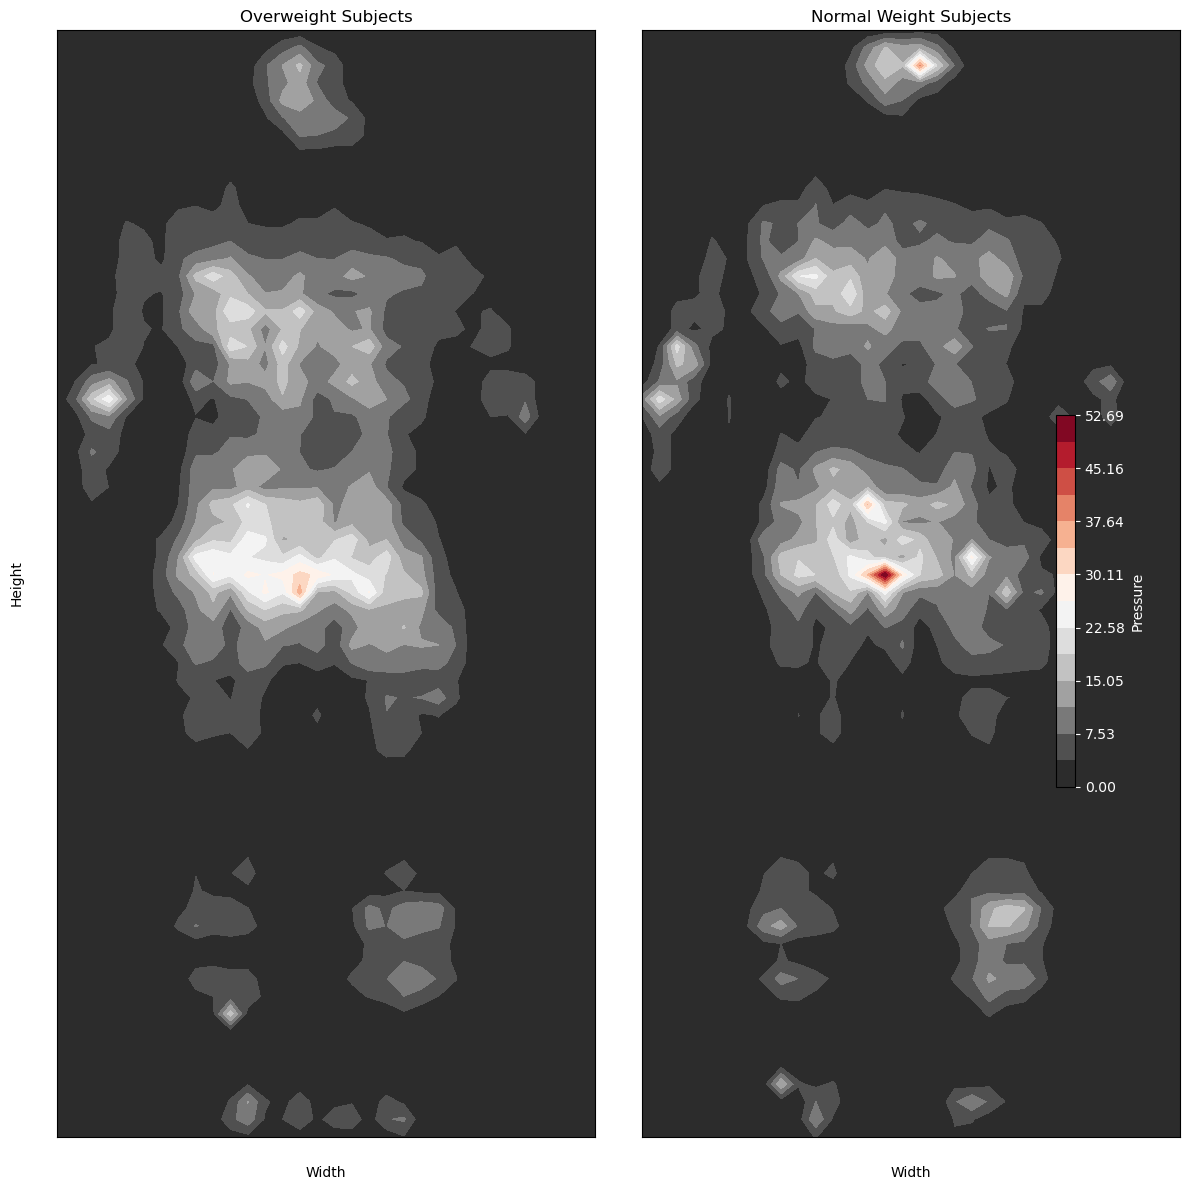

In [33]:
plot_pose_comparison_by_BMI(pose = "1")

/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_63596/2794045859.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


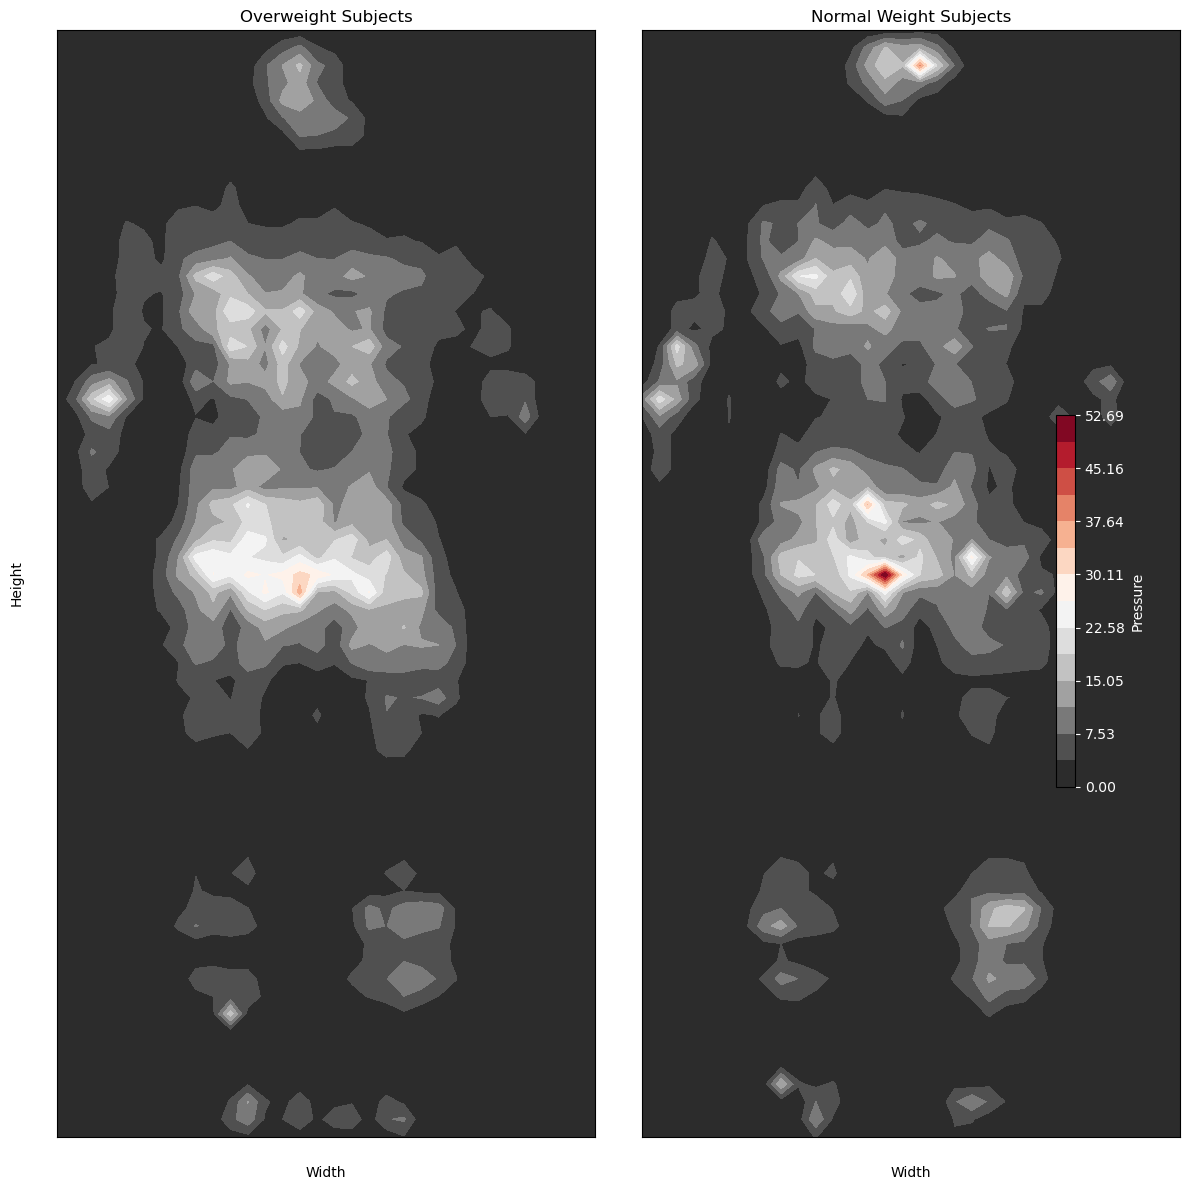

In [34]:
plot_pose_comparison_by_BMI(pose = "1")

In [35]:

def plot_pose_comparison_overweight(pose1_id, pose2_id, levels=15):
    """
    Plots a side-by-side contour map comparing the average pressure distribution 
    of two postures with identical contour levels.

    Parameters:
        pose1_id (str): Posture identifier for the first pose 
        pose2_id (str): Posture identifier for the second pose 
        levels (int): Number of contour levels (default is 15)
    """
    
    all_frames_pose1, all_frames_pose2 = [], []

    # Collect frames for Pose 1
    for subject, postures in subject_posture_data.items():
        if pose1_id in postures and subject in overweight_subject:
            all_frames_pose1.append(postures[pose1_id])  # Shape: (num_frames, 32, 64)

    # Collect frames for Pose 2
    for subject, postures in subject_posture_data.items():
        if pose2_id in postures and subject in overweight_subject:
            all_frames_pose2.append(postures[pose2_id])  # Shape: (num_frames, 32, 64)

    if all_frames_pose1 and all_frames_pose2:
        # Find minimum frame count across subjects for both postures
        min_frames_pose1 = min(f.shape[0] for f in all_frames_pose1)
        min_frames_pose2 = min(f.shape[0] for f in all_frames_pose2)

        # Trim all subject data to have the same frame count
        trimmed_pose1 = [f[:min_frames_pose1] for f in all_frames_pose1]
        trimmed_pose2 = [f[:min_frames_pose2] for f in all_frames_pose2]

        # Compute average pressure map for each posture
        avg_pose1 = np.mean(np.array(trimmed_pose1), axis=(0, 1))  # Mean over subjects and frames
        avg_pose2 = np.mean(np.array(trimmed_pose2), axis=(0, 1))  # Mean over subjects and frames

        # Find global min/max for consistent color scale
        vmin = min(avg_pose1.min(), avg_pose2.min())
        vmax = max(avg_pose1.max(), avg_pose2.max())

        # Generate identical contour levels
        contour_levels = np.linspace(vmin, vmax, levels)

        # Generate side-by-side contour plots
        fig, axes = plt.subplots(1, 2, figsize=(12, 12))

        # Contour Plot for Pose 1
        X, Y = np.meshgrid(np.arange(avg_pose1.shape[1]), np.arange(avg_pose1.shape[0]))
        contour1 = axes[0].contourf(X, Y, avg_pose1, levels=contour_levels, cmap='RdGy_r', vmin=vmin, vmax=vmax)
        axes[0].set_title('Sleeping on the Back')
        axes[0].set_xlabel('Width')
        axes[0].set_ylabel('Height')
        axes[0].invert_yaxis()
        axes[0].tick_params(colors='white')

        # Contour Plot for Pose 2
        contour2 = axes[1].contourf(X, Y, avg_pose2, levels=contour_levels, cmap='RdGy_r', vmin=vmin, vmax=vmax)
        axes[1].set_title(f'Sleeping on the Left')
        axes[1].set_xlabel('Width')
        axes[1].invert_yaxis()
        axes[1].tick_params(colors='white')

        # Common colorbar for both plots with white font
        cbar = fig.colorbar(contour2, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
        cbar.set_label('Pressure', color='white')
        cbar.ax.yaxis.set_tick_params(color='white')  # Change tick color
        plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')  # Change tick label color

        # Set white text for the entire figure
        
        plt.suptitle(f'Pressure Comparison: Posture {pose1_id} vs. Posture {pose2_id} (Same Contour Levels)', color='white')
        plt.tight_layout()
        plt.show()

    else:
        print(f"Not enough data found for Posture {pose1_id} or Posture {pose2_id}.")

/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_63596/3729560467.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


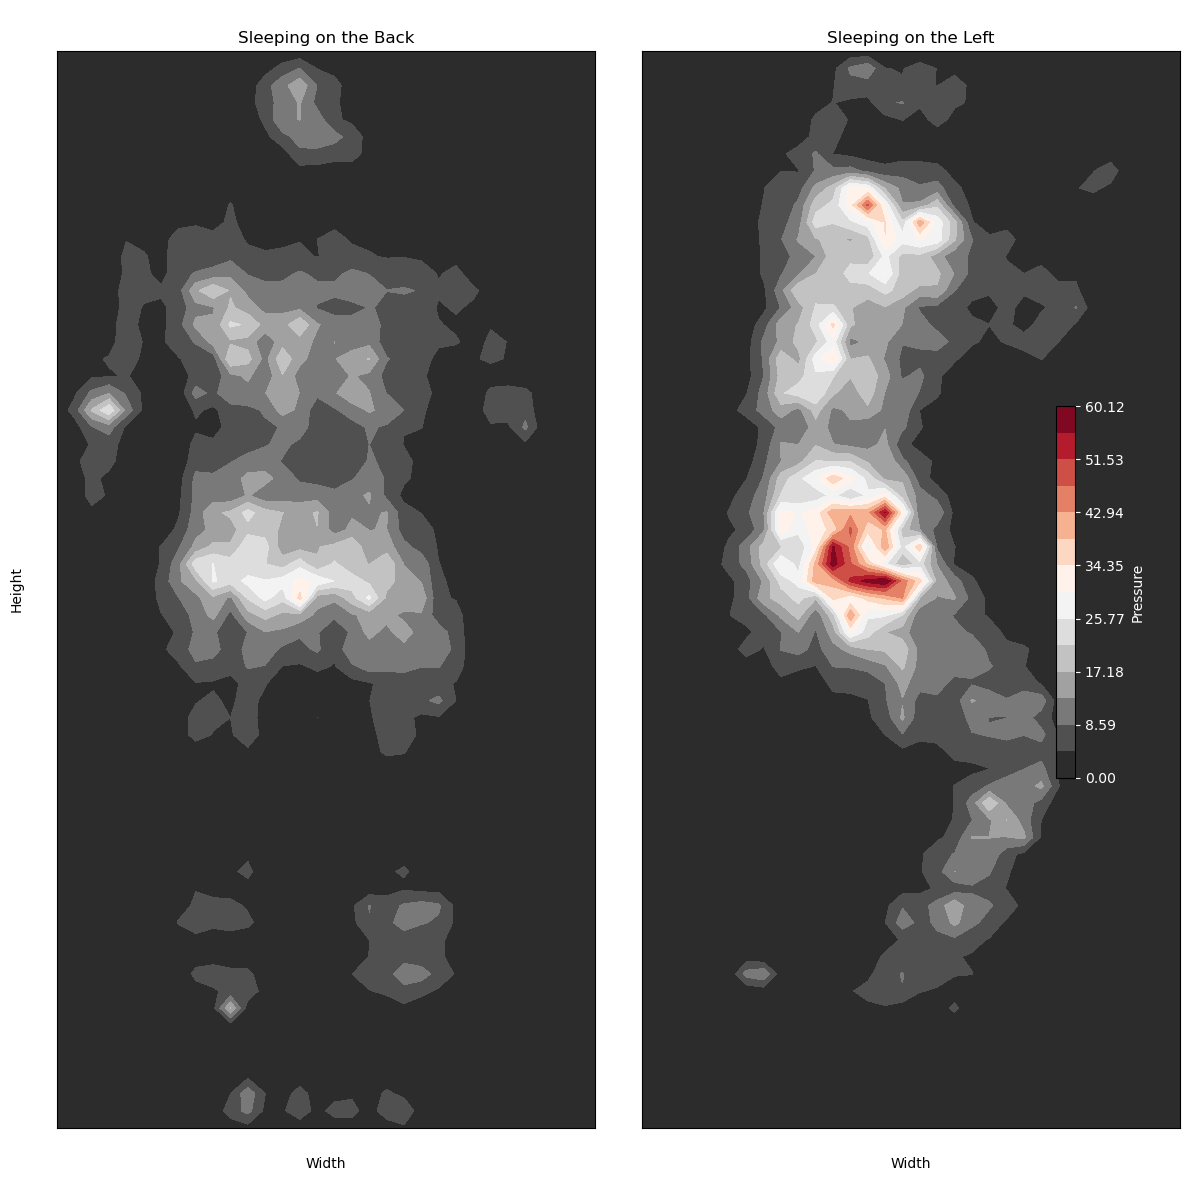

In [36]:
plot_pose_comparison_overweight(pose1_id="1", pose2_id="2")


In [37]:

def plot_pose_comparison_normal(pose1_id, pose2_id, levels=15):
    """
    Plots a side-by-side contour map comparing the average pressure distribution 
    of two postures with identical contour levels.

    Parameters:
        pose1_id (str): Posture identifier for the first pose 
        pose2_id (str): Posture identifier for the second pose 
        levels (int): Number of contour levels (default is 15)
    """
    
    all_frames_pose1, all_frames_pose2 = [], []

    # Collect frames for Pose 1
    for subject, postures in subject_posture_data.items():
        if pose1_id in postures and subject in normal_kg_subject:
            all_frames_pose1.append(postures[pose1_id])  # Shape: (num_frames, 32, 64)

    # Collect frames for Pose 2
    for subject, postures in subject_posture_data.items():
        if pose2_id in postures and subject in normal_kg_subject:
            all_frames_pose2.append(postures[pose2_id])  # Shape: (num_frames, 32, 64)

    if all_frames_pose1 and all_frames_pose2:
        # Find minimum frame count across subjects for both postures
        min_frames_pose1 = min(f.shape[0] for f in all_frames_pose1)
        min_frames_pose2 = min(f.shape[0] for f in all_frames_pose2)

        # Trim all subject data to have the same frame count
        trimmed_pose1 = [f[:min_frames_pose1] for f in all_frames_pose1]
        trimmed_pose2 = [f[:min_frames_pose2] for f in all_frames_pose2]

        # Compute average pressure map for each posture
        avg_pose1 = np.mean(np.array(trimmed_pose1), axis=(0, 1))  # Mean over subjects and frames
        avg_pose2 = np.mean(np.array(trimmed_pose2), axis=(0, 1))  # Mean over subjects and frames

        # Find global min/max for consistent color scale
        vmin = min(avg_pose1.min(), avg_pose2.min())
        vmax = max(avg_pose1.max(), avg_pose2.max())

        # Generate identical contour levels
        contour_levels = np.linspace(vmin, vmax, levels)

        # Generate side-by-side contour plots
        fig, axes = plt.subplots(1, 2, figsize=(12, 12))

        # Contour Plot for Pose 1
        X, Y = np.meshgrid(np.arange(avg_pose1.shape[1]), np.arange(avg_pose1.shape[0]))
        contour1 = axes[0].contourf(X, Y, avg_pose1, levels=contour_levels, cmap='RdGy_r', vmin=vmin, vmax=vmax)
        axes[0].set_title('Sleeping on the Back')
        axes[0].set_xlabel('Width')
        axes[0].set_ylabel('Height')
        axes[0].invert_yaxis()
        axes[0].tick_params(colors='white')

        # Contour Plot for Pose 2
        contour2 = axes[1].contourf(X, Y, avg_pose2, levels=contour_levels, cmap='RdGy_r', vmin=vmin, vmax=vmax)
        axes[1].set_title(f'Sleeping on the Left')
        axes[1].set_xlabel('Width')
        axes[1].invert_yaxis()
        axes[1].tick_params(colors='white')

        # Common colorbar for both plots with white font
        cbar = fig.colorbar(contour2, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
        cbar.set_label('Pressure', color='white')
        cbar.ax.yaxis.set_tick_params(color='white')  # Change tick color
        plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')  # Change tick label color

        # Set white text for the entire figure
        
        plt.suptitle(f'Pressure Comparison: Posture {pose1_id} vs. Posture {pose2_id} (Same Contour Levels)', color='white')
        plt.tight_layout()
        plt.show()

    else:
        print(f"Not enough data found for Posture {pose1_id} or Posture {pose2_id}.")

/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_63596/3705796783.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


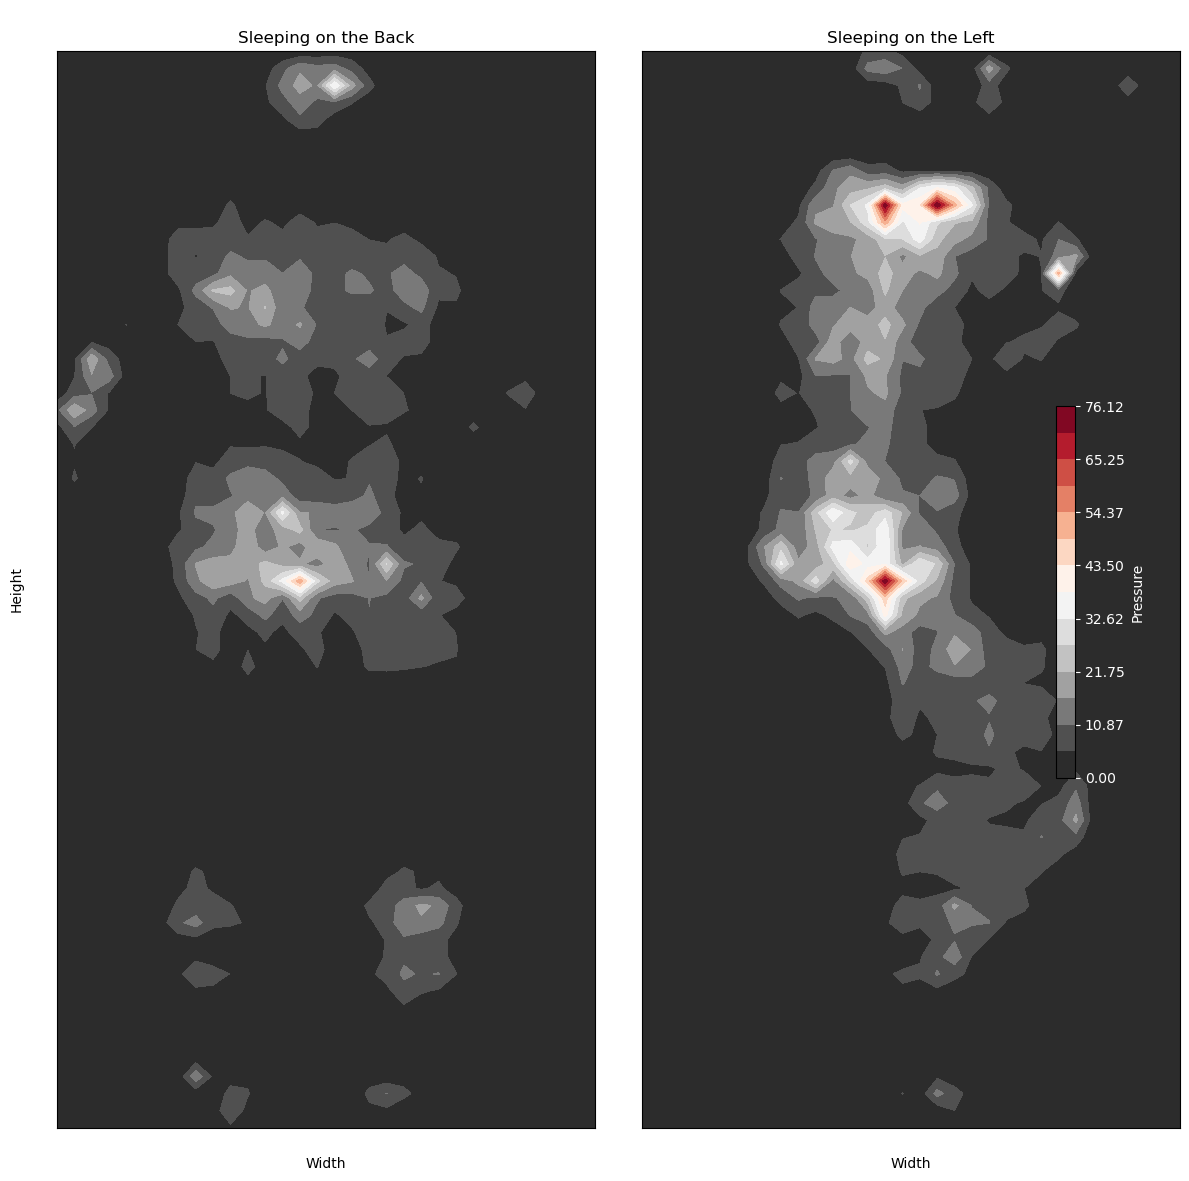

In [38]:
plot_pose_comparison_normal(pose1_id="1", pose2_id="2")


In [39]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pressure_difference_comparison(pose1_id="1", pose2_id="2", levels=15):
    """
    Computes and compares the pressure difference (last 10 - first 10 frames) 
    for two postures using side-by-side contour maps.

    Parameters:
        pose1_id (str): Posture identifier for the first pose (default: '1')
        pose2_id (str): Posture identifier for the second pose (default: '2')
        levels (int): Number of contour levels (default is 10)
    """
    all_frames_pose1, all_frames_pose2 = [], []

    # Collect frames for Posture 1
    for subject, postures in subject_posture_data.items():
        if pose1_id in postures and subject in overweight_subject:
            all_frames_pose1.append(postures[pose1_id])  # Shape: (num_frames, 32, 64)

    # Collect frames for Posture 2
    for subject, postures in subject_posture_data.items():
        if pose2_id in postures and subject in overweight_subject:
            all_frames_pose2.append(postures[pose2_id])  # Shape: (num_frames, 32, 64)

    if all_frames_pose1 and all_frames_pose2:
        # Find minimum frame count across subjects for both postures
        min_frames_pose1 = min(f.shape[0] for f in all_frames_pose1)
        min_frames_pose2 = min(f.shape[0] for f in all_frames_pose2)

     

        # Trim all subject data to have the same frame count
        trimmed_pose1 = [f[:min_frames_pose1] for f in all_frames_pose1]
        trimmed_pose2 = [f[:min_frames_pose2] for f in all_frames_pose2]

        # Compute average pressure per frame for each posture
        avg_pose1 = np.mean(np.array(trimmed_pose1), axis=0)  # Mean over subjects
        avg_pose2 = np.mean(np.array(trimmed_pose2), axis=0)  # Mean over subjects

        # Debugging: Print shapes
        print(f"Shape of avg_pose1: {avg_pose1.shape}, avg_pose2: {avg_pose2.shape}")

        # Ensure we slice along the correct axis (frames)
        if avg_pose1.shape[0] < 10 or avg_pose2.shape[0] < 10:
            print(f"Error: Not enough frames after averaging. Found {avg_pose1.shape[0]} frames.")
            return

        # Compute first and last 10-frame averages
        first_10_avg_pose1 = np.mean(avg_pose1[:20], axis=0)  # Shape: (32, 64)
        last_10_avg_pose1 = np.mean(avg_pose1[20:], axis=0)  # Shape: (32, 64)

        first_10_avg_pose2 = np.mean(avg_pose2[:20], axis=0)  # Shape: (32, 64)
        last_10_avg_pose2 = np.mean(avg_pose2[20:], axis=0)  # Shape: (32, 64)

        # Debugging: Print shapes
        print(f"Shape of first_10_avg_pose1: {first_10_avg_pose1.shape}, last_10_avg_pose1: {last_10_avg_pose1.shape}")
        print(f"Shape of first_10_avg_pose2: {first_10_avg_pose2.shape}, last_10_avg_pose2: {last_10_avg_pose2.shape}")

        # Compute the difference (last 10 - first 10) for each posture
        pressure_diff_pose1 = last_10_avg_pose1 - first_10_avg_pose1
        pressure_diff_pose2 = last_10_avg_pose2 - first_10_avg_pose2

        # Find global min/max for consistent color scale
        vmin = min(pressure_diff_pose1.min(), pressure_diff_pose2.min())
        vmax = max(pressure_diff_pose1.max(), pressure_diff_pose2.max())

        # Generate identical contour levels
        contour_levels = np.linspace(vmin, vmax, levels)

        # Generate side-by-side contour plots
        fig, axes = plt.subplots(1, 2, figsize=(12, 12))

        # Contour Plot for Posture 1
        X, Y = np.meshgrid(np.arange(pressure_diff_pose1.shape[1]), np.arange(pressure_diff_pose1.shape[0]))
        contour1 = axes[0].contourf(X, Y, pressure_diff_pose1, levels=contour_levels, cmap='RdBu_r', vmin=vmin, vmax=vmax)
        axes[0].set_title(f'Sleeping on the back')
        axes[0].set_xlabel('Width')
        axes[0].set_ylabel('Height')
        axes[0].invert_yaxis()

        # Contour Plot for Posture 2
        contour2 = axes[1].contourf(X, Y, pressure_diff_pose2, levels=contour_levels, cmap='RdBu_r', vmin=vmin, vmax=vmax)
        axes[1].set_title(f'Sleeping on the left')
        axes[1].set_xlabel('Width')
        axes[1].invert_yaxis()

        # Common colorbar for both plots
        cbar = fig.colorbar(contour2, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
        cbar.set_label('Pressure Change Over 20 Sec (mmHg)')

        plt.tight_layout()
        plt.show()

    else:
        print(f"Not enough data found for Posture {pose1_id} or Posture {pose2_id}.")


/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_63596/806363226.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Shape of avg_pose1: (77, 64, 32), avg_pose2: (65, 64, 32)
Shape of first_10_avg_pose1: (64, 32), last_10_avg_pose1: (64, 32)
Shape of first_10_avg_pose2: (64, 32), last_10_avg_pose2: (64, 32)


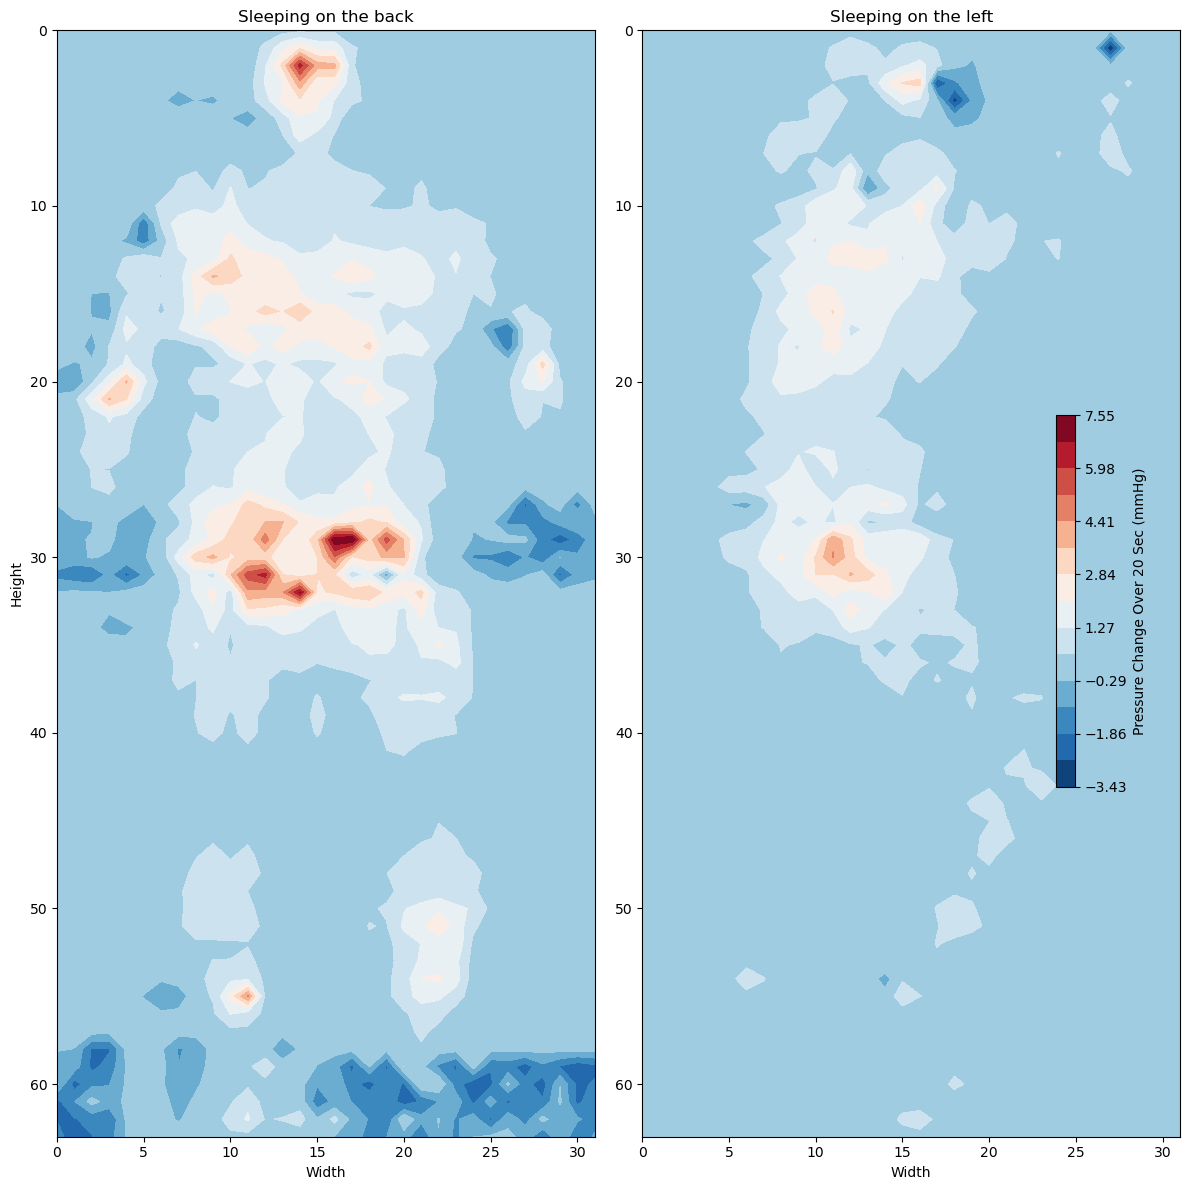

In [40]:
plot_pressure_difference_comparison(pose1_id="1", pose2_id="2")


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pose_comparison_all(pose1_id, pose2_id, levels=15):
    """
    Plots a 2x2 contour map comparing the average pressure distribution 
    of two postures for normal-weight and overweight subjects.

    Parameters:
        pose1_id (str): Posture identifier for the first pose.
        pose2_id (str): Posture identifier for the second pose.
        levels (int): Number of contour levels (default is 15).
    """
    
    def compute_average_pressure(pose_id, subject_group):
        """ Helper function to compute average pressure distribution for a given pose and subject group. """
        all_frames = [
            postures[pose_id] for subject, postures in subject_posture_data.items()
            if pose_id in postures and subject in subject_group
        ]
        
        if not all_frames:
            return None  # Not enough data
        
        min_frames = min(f.shape[0] for f in all_frames)
        trimmed_data = [f[:min_frames] for f in all_frames]
        return np.mean(np.array(trimmed_data), axis=(0, 1))  # Mean over subjects and frames

    # Compute average pressure maps
    avg_normal_pose1 = compute_average_pressure(pose1_id, normal_kg_subject)
    avg_normal_pose2 = compute_average_pressure(pose2_id, normal_kg_subject)
    avg_overweight_pose1 = compute_average_pressure(pose1_id, overweight_subject)
    avg_overweight_pose2 = compute_average_pressure(pose2_id, overweight_subject)

    # Determine global min/max pressure values for consistent contour levels
    vmin = min(avg_normal_pose1.min(), avg_normal_pose2.min(), avg_overweight_pose1.min(), avg_overweight_pose2.min())
    vmax = max(avg_normal_pose1.max(), avg_normal_pose2.max(), avg_overweight_pose1.max(), avg_overweight_pose2.max())
    contour_levels = np.linspace(vmin, vmax, levels)

    # Set up figure and axes (2x2 layout)
    fig, axes = plt.subplots(2, 2, figsize=(14, 28))
    
    # Meshgrid for contour plots
    X, Y = np.meshgrid(np.arange(avg_normal_pose1.shape[1]), np.arange(avg_normal_pose1.shape[0]))

    # Plot each contour
    plots = [
        (avg_normal_pose1, axes[0, 0], f'Normal Weight: Pose {pose1_id}'),
        (avg_normal_pose2, axes[0, 1], f'Normal Weight: Pose {pose2_id}'),
        (avg_overweight_pose1, axes[1, 0], f'Overweight: Pose {pose1_id}'),
        (avg_overweight_pose2, axes[1, 1], f'Overweight: Pose {pose2_id}')
    ]
    
    contours = []
    for avg_pressure, ax, title in plots:
        contour = ax.contourf(X, Y, avg_pressure, levels=contour_levels, cmap='RdGy_r', vmin=vmin, vmax=vmax)
        contours.append(contour)
        ax.set_title(title, fontsize=14, color='white')
        ax.set_xlabel('Width', fontsize=12, color='white')
        ax.set_ylabel('Height', fontsize=12, color='white')
        ax.invert_yaxis()
        ax.tick_params(colors='white')

    # Set white title for the figure
    plt.suptitle(f'Pressure Comparison: Normal vs. Overweight for Pose {pose1_id} and Pose {pose2_id}', color='white', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Create separate figure for colorbar
    fig_cbar = plt.figure(figsize=(2, 6))  # Adjust size as needed
    cbar_ax = fig_cbar.add_axes([0.1, 0.1, 0.3, 0.8])  # Position of colorbar
    cbar = fig_cbar.colorbar(contours[0], cax=cbar_ax)  # Use one of the contour plots for colorbar
    cbar.set_label('Pressure (mmHg)', color='black')  # Set label color
    cbar.ax.yaxis.set_tick_params(color='black')
    plt.setp(cbar.ax.yaxis.get_ticklabels(), color='black')  # Set tick label color
    plt.show()  # Show separate colorbar



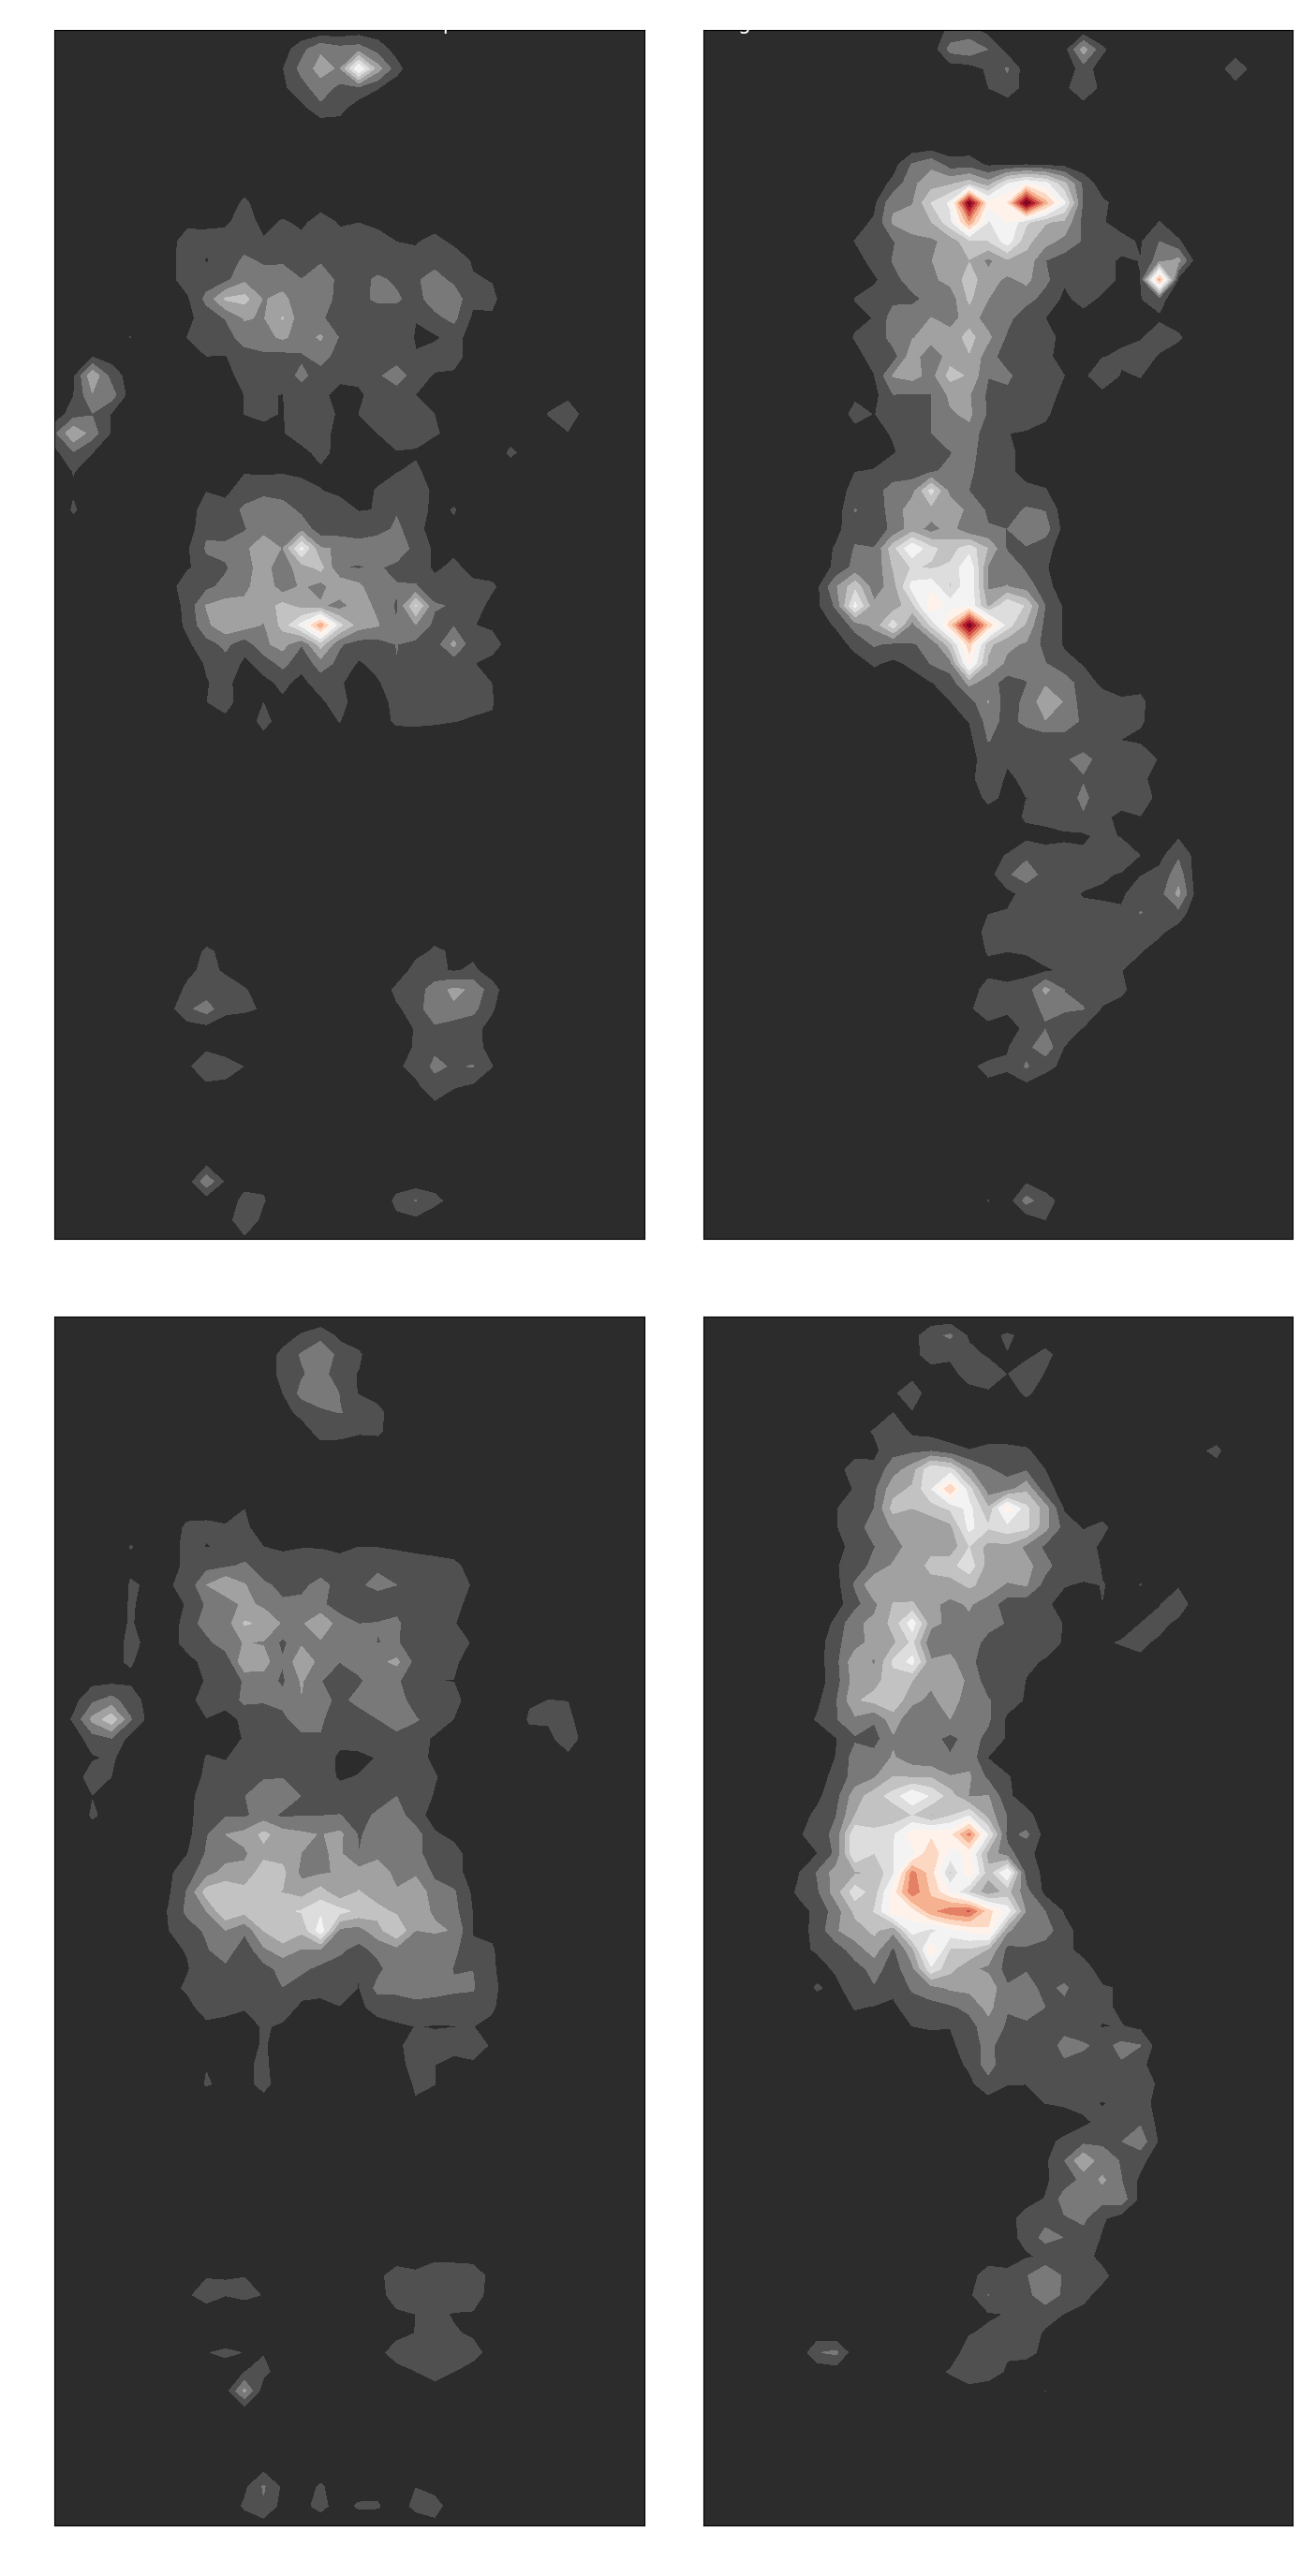

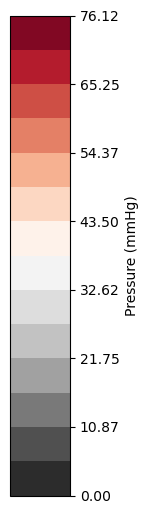

In [42]:
plot_pose_comparison_all(pose1_id="1", pose2_id="2", levels=15)


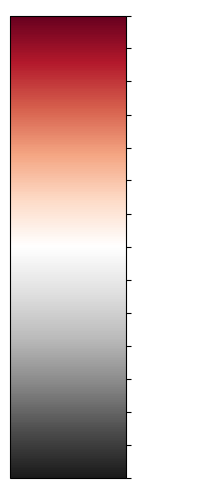

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_only_colorbar(vmin, vmax, levels=15, cmap='RdGy_r'):
    """
    Plots only the colorbar without any contour plot.
    
    Parameters:
        vmin (float): Minimum pressure value.
        vmax (float): Maximum pressure value.
        levels (int): Number of contour levels.
        cmap (str): Colormap for the colorbar.
    """
    
    fig, ax = plt.subplots(figsize=(1.5, 6))  # Adjust figure size for a vertical colorbar
    
    # Create a dummy scalar mappable for the colorbar
    norm = plt.Normalize(vmin, vmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # No data needed

    # Add the colorbar
    cbar = fig.colorbar(sm, cax=ax, orientation='vertical', ticks=np.linspace(vmin, vmax, levels))
    cbar.set_label('Pressure', color='white', fontsize=12)
    
    # Customize tick labels
    cbar.ax.yaxis.set_tick_params(color='black')
    plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')

    plt.show()

# Example Usage: Set vmin and vmax based on your data range
plot_only_colorbar(vmin=0, vmax=100)


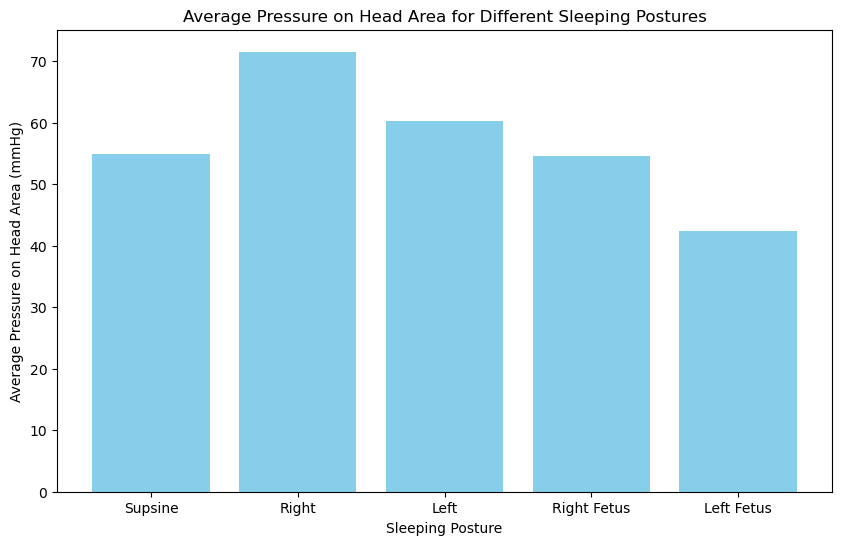

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sleeping postures
sleeping_postures = ['Supsine', 'Right', 'Left', 'Right Fetus', 'Left Fetus']

# Generate random values for the average pressure on the head area
np.random.seed(0)  # For reproducibility
average_pressures = np.random.rand(len(sleeping_postures)) * 100  # Random values between 0 and 100

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sleeping_postures, average_pressures, color='skyblue')
plt.xlabel('Sleeping Posture')
plt.ylabel('Average Pressure on Head Area (mmHg)')
plt.title('Average Pressure on Head Area for Different Sleeping Postures')
plt.show()


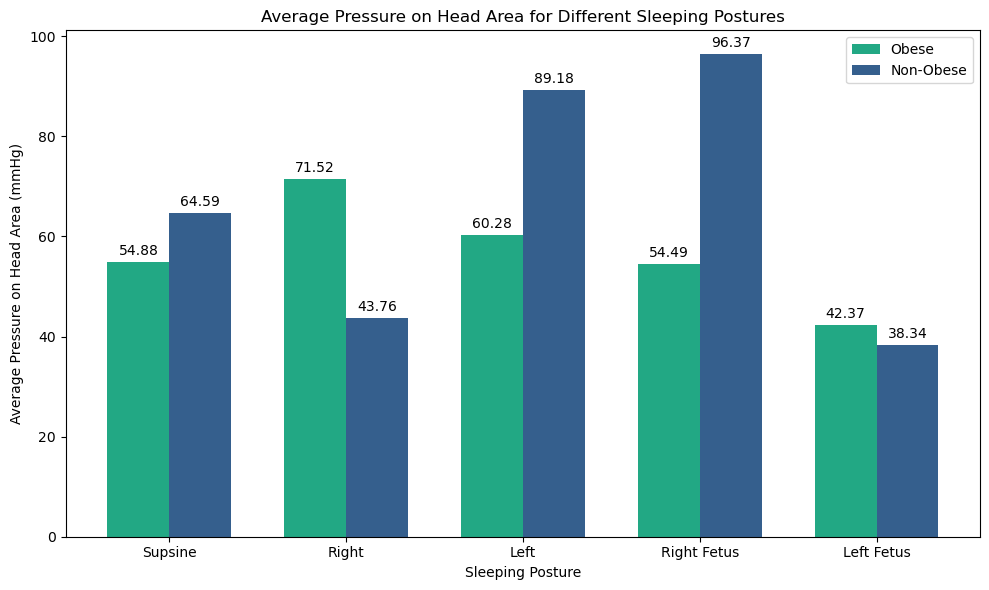

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sleeping postures
sleeping_postures = ['Supsine', 'Right', 'Left', 'Right Fetus', 'Left Fetus']

# Generate random values for the average pressure on the head area for both individuals
np.random.seed(0)  # For reproducibility
average_pressures_obese = np.random.rand(len(sleeping_postures)) * 100  # Random values between 0 and 100
average_pressures_non_obese = np.random.rand(len(sleeping_postures)) * 100  # Random values between 0 and 100

# Create the bar plot
x = np.arange(len(sleeping_postures))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, average_pressures_obese, width, label='Obese', color=plt.cm.viridis(0.6))
bars2 = ax.bar(x + width/2, average_pressures_non_obese, width, label='Non-Obese', color=plt.cm.viridis(0.3))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Sleeping Posture')
ax.set_ylabel('Average Pressure on Head Area (mmHg)')
ax.set_title('Average Pressure on Head Area for Different Sleeping Postures')
ax.set_xticks(x)
ax.set_xticklabels(sleeping_postures)
ax.legend()

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

fig.tight_layout()

plt.show()